In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from load_data_and_distribution_analisys import split_dataset_v1, load_dataset_cleaned, plot_confusion_matrix

# Esempio con Random Forest

In questo notebook vengono riportati i primi risultati ottenuti utilizzando uno dei modelli più diffusi in ambito medico: la Random Forest. Verrà di seguito testato inizialmente un modello di Random Forest base e successivamente verrà fatta una ricerca degli iperparametri ottimali che ci permettano di ottenere un modello più preciso possibile.

In [2]:
dataset_cleaned = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2
   sex  age  height  weight  ...  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN
0    1   35     170      75  ...      35.0       40.0               1.0       1
1    1   30     180      80  ...      36.0       27.0               3.0       0
2    1   40     165      75  ...      32.0       68.0               1.0       0
3    1   50     175      80  ...      34.0       18.0               1.0       0
4    1   50     165      60  ...      12.0       25.0               1.0       0

[5 rows x 24 columns]


In [4]:
X_smoke, Y_smoke, X_drink, Y_drink = split_dataset_v1(dataset_cleaned)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, Y_smoke, test_size=0.3, random_state=42, stratify=Y_smoke)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drink, Y_drink, test_size=0.3, random_state=42, stratify=Y_drink)

### Esempio smoke

              precision    recall  f1-score   support

         1.0       0.82      0.84      0.83    167528
         2.0       0.44      0.35      0.39     47377
         3.0       0.51      0.56      0.54     58574

    accuracy                           0.69    273479
   macro avg       0.59      0.58      0.58    273479
weighted avg       0.69      0.69      0.69    273479



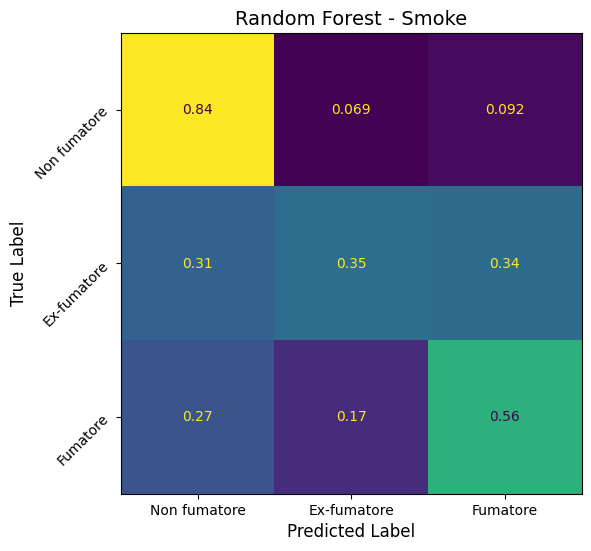

In [6]:
forest = RandomForestClassifier(random_state=42, class_weight="balanced")
forest.fit(X_train_s, y_train_s)
y_pred_rf_s = forest.predict(X_test_s)
report = classification_report(y_test_s, y_pred_rf_s)
print(report)
plot_confusion_matrix(y_test_s, y_pred_rf_s, display_labels=["Non fumatore", "Ex-fumatore", "Fumatore"], title="Random Forest - Smoke")

              precision    recall  f1-score   support

           0       0.72      0.71      0.72    135539
           1       0.72      0.73      0.73    137940

    accuracy                           0.72    273479
   macro avg       0.72      0.72      0.72    273479
weighted avg       0.72      0.72      0.72    273479



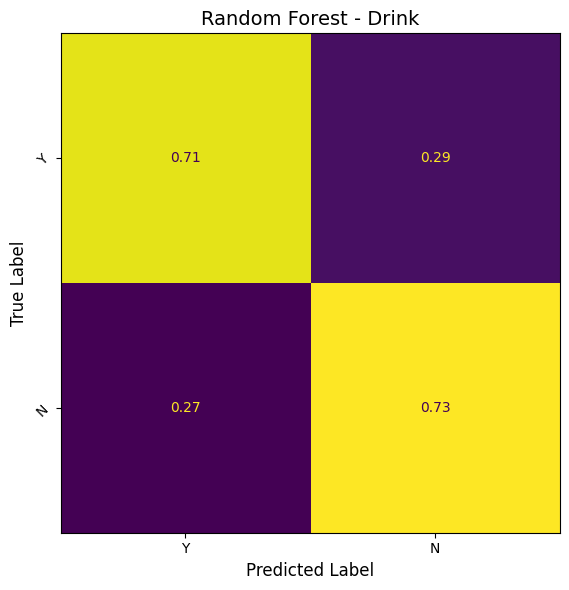

In [7]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_d, y_train_d)
y_pred_rf_d = forest.predict(X_test_d)
report = classification_report(y_test_d, y_pred_rf_d)
print(report)
plot_confusion_matrix(y_test_d, y_pred_rf_d, display_labels=["Y", "N"], title="Random Forest - Drink")

In [ ]:
# Procediamo con il selezionare un paio di parametri e combinarli tra loro per vedere quale modello ottiene i risultati migliori

parameters = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [50, 100, 200]
}

In [ ]:
for n_estimators in parameters["n_estimators"]:
    for max_depth in parameters["max_depth"]:
        for min_samples_split in parameters["min_samples_split"]:
            forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42, class_weight="balanced")
            forest.fit(X_train_s, y_train_s)
            y_pred_rf_s = forest.predict(X_test_s)
            accuracy_rf_s = accuracy_score(y_test_s, y_pred_rf_s)
            precision_rf_s = precision_score(y_test_s, y_pred_rf_s, average="weighted")
            recall_rf_s = recall_score(y_test_s, y_pred_rf_s, average="weighted")
            f1_rf_s = f1_score(y_test_s, y_pred_rf_s, average="weighted")
            print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}")
            print(f"    Accuratezza: {accuracy_rf_s*100:.2f}%")
            print(f"    Precisione: {precision_rf_s*100:.2f}%")
            print(f"    Recall: {recall_rf_s*100:.2f}%")
            print(f"    F1: {f1_rf_s*100:.2f}%")

La miglior scelta dei parametri risulta essere la seguente:
- **n_estimators**: 100
- **max_depth**: 20
- **min_samples_split**: 50

              precision    recall  f1-score   support

         1.0       0.94      0.73      0.82    167528
         2.0       0.41      0.58      0.48     47377
         3.0       0.48      0.64      0.55     58574

    accuracy                           0.68    273479
   macro avg       0.61      0.65      0.62    273479
weighted avg       0.75      0.68      0.71    273479



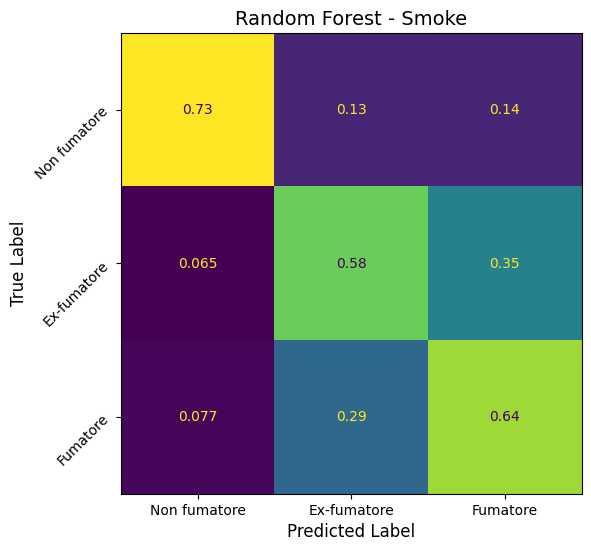

In [8]:
forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=50, random_state=42, class_weight="balanced")
forest.fit(X_train_s, y_train_s)
y_pred_rf_s = forest.predict(X_test_s)
report = classification_report(y_test_s, y_pred_rf_s)
print(report)
plot_confusion_matrix(y_test_s, y_pred_rf_s, display_labels=["Non fumatore", "Ex-fumatore", "Fumatore"], title="Random Forest - Smoke")

In [ ]:
for n_estimators in parameters["n_estimators"]:
    for max_depth in parameters["max_depth"]:
        for min_samples_split in parameters["min_samples_split"]:
            forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
            forest.fit(X_train_d, y_train_d)
            y_pred_rf_d = forest.predict(X_test_d)
            accuracy_rf_d = accuracy_score(y_test_d, y_pred_rf_d)
            precision_rf_d = precision_score(y_test_d, y_pred_rf_d)
            recall_rf_d = recall_score(y_test_d, y_pred_rf_d)
            f1_rf_d = f1_score(y_test_d, y_pred_rf_d)
            print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}")
            print(f"    Accuratezza: {accuracy_rf_d*100:.2f}%")
            print(f"    Precisione: {precision_rf_d*100:.2f}%")
            print(f"    Recall: {recall_rf_d*100:.2f}%")
            print(f"    F1: {f1_rf_d*100:.2f}%")

La miglior scelta dei parametri risulta essere la seguente:
- **n_estimators**: 100
- **max_depth**: 20
- **min_samples_split**: 50

              precision    recall  f1-score   support

           0       0.73      0.71      0.72    135539
           1       0.72      0.75      0.73    137940

    accuracy                           0.73    273479
   macro avg       0.73      0.73      0.73    273479
weighted avg       0.73      0.73      0.73    273479



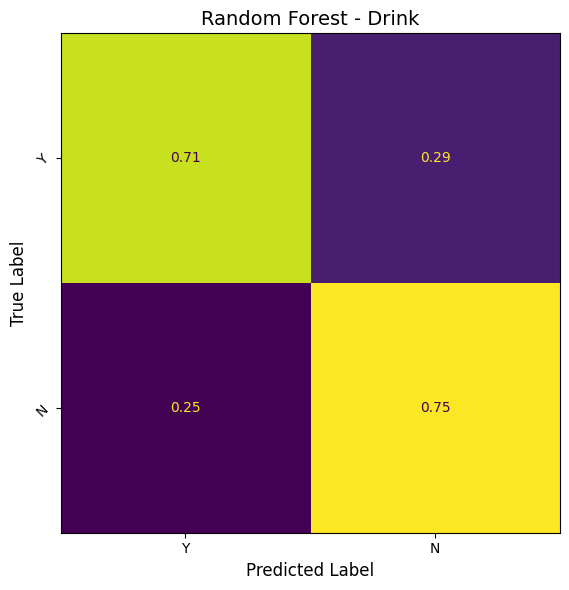

In [9]:
forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=50, random_state=42)
forest.fit(X_train_d, y_train_d)
y_pred_rf_d = forest.predict(X_test_d)
report = classification_report(y_test_d, y_pred_rf_d)
print(report)
plot_confusion_matrix(y_test_d, y_pred_rf_d, display_labels=["Y", "N"], title="Random Forest - Drink")

Ora che sono stati definiti i parametri migliori per le random forest, procediamo con la tecnica della feature selection con la speranza di migliorare i risultati di accuratezza, precisione, recall e f1_score; pensiamo sia un'operazione da compiere per poter ottenere risultati migliori, perchè abbiamo a che fare con un dataset con 22 feature e il rischio di overfit c'è. Probabilmente con una random forest questo rischio è minore, però testiamo se anche con una random forest i risultati migliorano.